## Import Required Libraries

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import scale


## Read the Data

In [3]:
training_data = pd.read_csv('train.csv',encoding = 'ISO-8859-1')

In [4]:
training_data.shape

(42000, 785)

In [5]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation - I

In [6]:
#check the percentage of null values
training_data.loc[:,training_data.isnull().sum()!=0].columns

Index([], dtype='object')

- As there are no null values, nothing to drop

In [7]:
#Drop the duplicate records if any
training_data.drop_duplicates(inplace=True)

In [8]:
training_data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

- There are 10 digits in the data (0 through 9) that need to be identified. 


In [9]:
#Check distribution of various classes of label

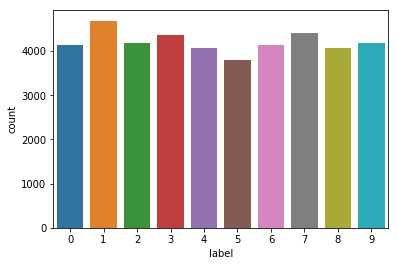

In [10]:
sns.countplot(training_data['label'])

- So the classes, do not look skewed, we have a fair distribution of data points from each of the classes.

In [11]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#help(plt.imshow)

In [13]:
#help(plt.matshow)

In [14]:
help(plt.matshow)

Help on function matshow in module matplotlib.pyplot:

matshow(A, fignum=None, **kw)
    Display an array as a matrix in a new figure window.
    
    The origin is set at the upper left hand corner and rows (first
    dimension of the array) are displayed horizontally.  The aspect
    ratio of the figure window is that of the array, unless this would
    make an excessively short or narrow figure.
    
    Tick labels for the xaxis are placed on top.
    
    With the exception of *fignum*, keyword arguments are passed to
    :func:`~matplotlib.pyplot.imshow`.  You may set the *origin*
    kwarg to "lower" if you want the first row in the array to be
    at the bottom instead of the top.
    
    
    *fignum*: [ None | integer | False ]
      By default, :func:`matshow` creates a new figure window with
      automatic numbering.  If *fignum* is given as an integer, the
      created figure will use this figure number.  Because of how
      :func:`matshow` tries to set the figure aspe

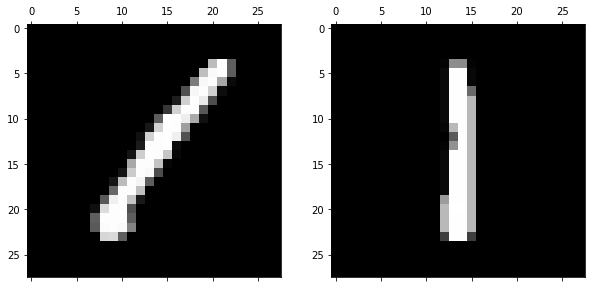

In [15]:
#Lets visualize some digits to see how do they look on pixel scale
digit_1_1 = training_data.iloc[0,1:]
digit_1_1 = digit_1_1.values.reshape(28,28)
digit_1_2 = training_data.iloc[2,1:]
digit_1_2 = digit_1_2.values.reshape(28,28)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#plt.imshow(digit_1_1)
plt.matshow(digit_1_1,fignum=0, cmap = 'gray')

plt.subplot(1,2,2)
plt.matshow(digit_1_2,fignum=0, cmap = 'gray')
plt.show()

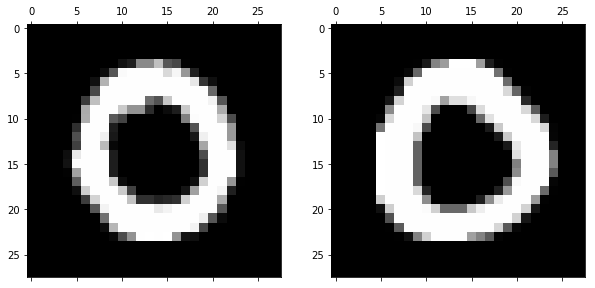

In [16]:
#Lets visualize some digits to see how do they look on pixel scale
digit_0_1 = training_data.iloc[1,1:]
digit_0_1 = digit_0_1.values.reshape(28,28)
digit_0_2 = training_data.iloc[4,1:]
digit_0_2 = digit_0_2.values.reshape(28,28)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#plt.imshow(digit_1_1)
plt.matshow(digit_0_1,fignum=0, cmap = 'gray')

plt.subplot(1,2,2)
plt.matshow(digit_0_2,fignum=0, cmap = 'gray')
plt.show()

- So we see there are slight variations in pixels for the same digit. Same digit can be written in many different ways

### Feature Standardization
- All our features(pixels) denote different pixel properties of a digit
- We need to standardize them and get them on a common scale so that the model we build does not give heavy weightage to variables(pixels) that have a high magnitude numerically for a few digits

In [17]:
#Copy all independent variables in X
X = training_data.copy(deep=True)
X.drop('label',inplace=True,axis=1)

In [18]:
#Copy the target variable in Y
Y = training_data['label']

In [19]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


- The mean values and standard deviation values for the dataset given vary widely and hence the dataset need to be scaled

In [20]:
#help(scale)

In [21]:
cols = X.columns
X_scaled = pd.DataFrame(scale(X))
X_scaled.columns = cols
X_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


In [22]:
#X_scaled.describe()

## Sampling the Data
- There are 42000 records in the dataset which is quite huge. Running algorithm on this will take a lot of time.
- We can train the model on 20% of the data(8400 records) and use the rest 80% as test data.

In [23]:
#help(train_test_split)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.8, train_size=0.2, random_state=100)

In [25]:
X_train.shape

(8400, 784)

In [26]:
X_test.shape

(33600, 784)

## Building & Evaluating the SVM Model

### Linear SVM Model
- Before moving to a non-linear kernel upfront, lets see how a linear kernel performs too

In [27]:
# Building a Linear Model

# instantiate an object of class SVC(), by default, the value of C (Cost function) is 1
svc_linear_model = SVC(kernel='linear')

In [28]:
# fit
svc_linear_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
# predict
Y_pred_linear = svc_linear_model.predict(X_test)

In [30]:
#get the confusion metrics
from sklearn import metrics
metrics.confusion_matrix(y_true=Y_test, y_pred = Y_pred_linear)

array([[3194,    0,   23,    6,   10,   21,   25,    2,    9,    0],
       [   0, 3669,   21,   13,    3,    5,    1,    6,   26,    4],
       [  44,   24, 3005,   85,   44,   10,   32,   26,   50,   12],
       [  20,   18,   95, 3131,    4,  129,    5,   19,   61,   29],
       [  14,   10,   36,    7, 2996,   12,   19,   14,    7,  129],
       [  29,   19,   27,  145,   32, 2701,   51,    6,   62,   17],
       [  55,   10,   53,    4,   28,   54, 3071,    0,   10,    0],
       [  10,   28,   40,   31,   66,    3,    1, 3169,    5,  144],
       [  25,   68,   57,  151,   22,  111,   26,   23, 2733,   25],
       [  23,   10,   23,   33,  160,    7,    0,  153,   24, 2930]],
      dtype=int64)

In [31]:
#help(metrics.accuracy_score)
# Lets also check other metrics w.r.t the predicted data

# accuracy
print("accuracy", metrics.accuracy_score(Y_test, Y_pred_linear))

accuracy 0.9106845238095238


In [32]:
# precision
#help(metrics.precision_score)
print("precision", metrics.precision_score(Y_test, Y_pred_linear, average = 'weighted'))

precision 0.9107490916470817


In [33]:
# recall/sensitivity
print("recall", metrics.recall_score(Y_test, Y_pred_linear,  average = 'weighted'))

recall 0.9106845238095238


#### Class-wise Accuracy

In [34]:
#help(metrics.classification_report)
print(metrics.classification_report(y_true = Y_test, y_pred = Y_pred_linear))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3290
          1       0.95      0.98      0.97      3748
          2       0.89      0.90      0.90      3332
          3       0.87      0.89      0.88      3511
          4       0.89      0.92      0.91      3244
          5       0.88      0.87      0.88      3089
          6       0.95      0.93      0.94      3285
          7       0.93      0.91      0.92      3497
          8       0.91      0.84      0.88      3241
          9       0.89      0.87      0.88      3363

avg / total       0.91      0.91      0.91     33600



- Individual class wise accuracy looks comparable to the overall accuracy. The model looks decent

### Non-Linear SVM Model
- We have a decent accuracy with Linear SVM, lets also now see how it is with Non-Linear model
- With Non-Linear model, we will have 2 hyperparameters to tune 
    - C (the Cost Function) and <br>
    - Gamma (the amount of Non-Linearity)
    
- Lets first build a non linear model with default hyperparameters

In [35]:
# Building a Linear Model

# instantiate an object of class SVC(), by default, the value of C (Cost function) is 1
svc_nonlinear_model_default = SVC(kernel='rbf')

In [36]:
# fit
svc_nonlinear_model_default.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
# predict
Y_pred_nonlinear_default = svc_nonlinear_model_default.predict(X_test)

In [38]:
#get the confusion metrics
from sklearn import metrics
metrics.confusion_matrix(y_true=Y_test, y_pred = Y_pred_nonlinear_default)

array([[3199,    0,   32,    2,    3,   13,   28,    1,   12,    0],
       [   0, 3654,   39,   12,    5,    9,    6,    4,   16,    3],
       [  15,    8, 3190,   21,   22,    2,   16,   22,   29,    7],
       [   5,   14,  123, 3187,    4,   65,    8,   32,   56,   17],
       [   3,    8,   63,    0, 3029,   10,   18,   13,    7,   93],
       [  12,    7,   47,   82,   17, 2841,   49,    6,   17,   11],
       [  18,    6,   67,    0,   13,   32, 3140,    0,    9,    0],
       [   1,   26,  117,   11,   21,    3,    1, 3192,    2,  123],
       [  20,   36,   71,   56,   16,   73,   14,   12, 2918,   25],
       [  14,   12,   64,   38,   56,   10,    1,  109,   24, 3035]],
      dtype=int64)

In [39]:
#help(metrics.accuracy_score)
# Lets also check other metrics w.r.t the predicted data

# accuracy
print("accuracy", metrics.accuracy_score(Y_test, Y_pred_nonlinear_default))

accuracy 0.9340773809523809


In [40]:
# precision
#help(metrics.precision_score)
print("precision", metrics.precision_score(Y_test, Y_pred_nonlinear_default, average = 'weighted'))

precision 0.935523805787196


In [41]:
# recall/sensitivity
print("recall", metrics.recall_score(Y_test, Y_pred_nonlinear_default,  average = 'weighted'))

recall 0.9340773809523809


#### Class-wise Accuracy

In [42]:
#help(metrics.classification_report)
print(metrics.classification_report(y_true = Y_test, y_pred = Y_pred_nonlinear_default))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      3290
          1       0.97      0.97      0.97      3748
          2       0.84      0.96      0.89      3332
          3       0.93      0.91      0.92      3511
          4       0.95      0.93      0.94      3244
          5       0.93      0.92      0.92      3089
          6       0.96      0.96      0.96      3285
          7       0.94      0.91      0.93      3497
          8       0.94      0.90      0.92      3241
          9       0.92      0.90      0.91      3363

avg / total       0.94      0.93      0.93     33600



- The non - linear model gives us a better accuracy(93.4%) compared to the Linear model(~91%). 
- Lets explore Non-Linear model more to get the optimal hyperparameters

### Grid Search to Find Optimal Hyperparameters

Let's use the RBF kernel to find the optimal C and gamma. Since we need to find 2 optimal hyperparameters from among a number of possible values, lets use Grid Search CV to achieve this

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [44]:
#help(KFold)

In [45]:
#help(GridSearchCV)

In [46]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle=True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [{'gamma':[1e-2,1e-3,1e-4],'C':[1,10,100,1000]}]

#specify the model
svc_nonlinear_model = SVC(kernel='rbf')

model_cv = GridSearchCV(estimator = svc_nonlinear_model,
                        param_grid = hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1,
                        return_train_score = True,
                        n_jobs=-1
                       )

In [47]:
#fit the model
model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 34.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,154.068315,3.259838,19.514407,0.231947,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752976,0.754762,0.758333,...,0.749286,0.008776,12,0.999851,0.999851,0.999851,0.999851,0.999851,0.999851,1.110223e-16
1,39.521100,0.334879,11.501140,0.216770,1,0.001,"{'C': 1, 'gamma': 0.001}",0.933929,0.933929,0.935714,...,0.933690,0.004859,4,0.975595,0.975298,0.974851,0.976488,0.973810,0.975208,8.808719e-04
2,60.509768,3.148778,15.652645,0.432291,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.886905,0.905357,0.910119,...,0.900595,0.007779,8,0.917411,0.913244,0.916369,0.916220,0.912351,0.915119,1.959771e-03
3,172.046358,17.531969,18.762164,1.615514,10,0.01,"{'C': 10, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,28.020413,0.523539,8.324219,0.189284,10,0.001,"{'C': 10, 'gamma': 0.001}",0.942262,0.945833,0.947024,...,0.942976,0.004508,3,0.999554,0.999702,0.999256,0.999256,0.999851,0.999524,2.380952e-04
5,21.132490,0.361430,7.668515,0.083604,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.930952,0.930357,0.928571,...,0.928214,0.003483,6,0.963690,0.964286,0.962649,0.963839,0.962649,0.963423,6.614914e-04
6,143.020876,5.680927,18.237259,0.411003,100,0.01,"{'C': 100, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,31.274896,0.275514,9.676874,0.646253,100,0.001,"{'C': 100, 'gamma': 0.001}",0.942262,0.947024,0.947619,...,0.944048,0.003511,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,18.259180,0.377762,7.082298,0.287475,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929167,0.929167,0.929167,...,0.928452,0.003865,5,0.996726,0.995238,0.996577,0.996131,0.995089,0.995952,6.747491e-04
9,152.825036,2.559788,18.427843,0.517306,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


- Lets plot gamma against C and see what is the optimal value for both

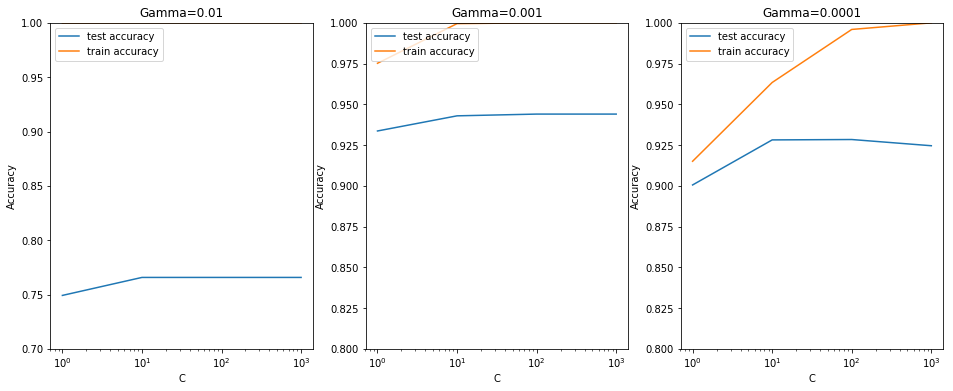

In [49]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [50]:
cv_results[cv_results['param_gamma']==0.01]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,154.068315,3.259838,19.514407,0.231947,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752976,0.754762,0.758333,...,0.749286,0.008776,12,0.999851,0.999851,0.999851,0.999851,0.999851,0.999851,1.110223e-16
3,172.046358,17.531969,18.762164,1.615514,10,0.01,"{'C': 10, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,143.020876,5.680927,18.237259,0.411003,100,0.01,"{'C': 100, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,152.825036,2.559788,18.427843,0.517306,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.772024,0.772619,0.770833,...,0.765833,0.009164,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


This plot reveals some interesting insights:
- **High values of gamma (0.01)**  lead to **overfitting** .The training accuracy at gamma=0.01 is 100%
- The **training score reaches close to 100% after C=10 with higher gamma = 0.001**. At C=10, the accuracy is 94%
- At gamma 0.0001, the model is okay but does not gaurantee as good accuracy as before


In [51]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.944047619047619 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), still we can see that at a reduced cost C=10, we are not compromising with accuracy. 

We can achieve comparable average test accuracy with gamma=0.001 and C=10 as well, and that too with a reduced cost C = 10 for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

It is desired to have a simpler model with less cost as possible, so we choose gamma=0.001 and a C=10.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model with C=10 and gamma = 0.001, i.e. the model with highest test accuracy.

In [52]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.001, "kernel":"rbf"}

# model
final_model = SVC(C=10, gamma=0.001, kernel="rbf")

final_model.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test)

# metrics
print(metrics.confusion_matrix(Y_test, Y_pred), "\n")

[[3216    0   24    1    3   13   20    1   12    0]
 [   0 3666   33   10    5    3    5    6   16    4]
 [  14   13 3188   33   16    2   18   17   25    6]
 [   5    4   90 3249    3   52    9   22   58   19]
 [   6    8   49    0 3059    7   12   14    9   80]
 [   9    6   38   70   11 2869   47    6   19   14]
 [  26    3   56    1   14   29 3146    0   10    0]
 [   4   24   88   17   29    2    0 3268    4   61]
 [  16   19   59   61   17   65   13   10 2957   24]
 [  17    8   53   23   63    9    1   95   14 3080]] 



In [53]:
print("accuracy", metrics.accuracy_score(Y_test, Y_pred))
print("precision", metrics.precision_score(Y_test, Y_pred, average='weighted'))
print("sensitivity/recall", metrics.recall_score(Y_test, Y_pred, average='weighted'))

accuracy 0.9433928571428571
precision 0.9441691897065326
sensitivity/recall 0.9433928571428571


## Conclusion

The accuracy achieved using a non-linear kernel is higher than linear model. Thus, it turns out that for this problem, **we can go with a non-linear model**.<br><br>
We can go with a Linear model also considering simplicity over complexity. But non-linear model is giving us better accuracy

#### Class-wise Accuracy

In [54]:
#help(metrics.classification_report)
#pd.DataFrame(metrics.classification_report(y_true = Y_test, y_pred = Y_pred))
print(metrics.classification_report(y_true = Y_test, y_pred = Y_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      3290
          1       0.98      0.98      0.98      3748
          2       0.87      0.96      0.91      3332
          3       0.94      0.93      0.93      3511
          4       0.95      0.94      0.95      3244
          5       0.94      0.93      0.93      3089
          6       0.96      0.96      0.96      3285
          7       0.95      0.93      0.94      3497
          8       0.95      0.91      0.93      3241
          9       0.94      0.92      0.93      3363

avg / total       0.94      0.94      0.94     33600



- As we see, the individual class wise accuracy also looks good, there is no skewness in the overall accuracy
- The precision for almost all classes is over .90 (it is 0.87 for 1 class, but this is not too low compared to the average)
- The Recall (True Positive Rate or Sensitivity of all classes is good)
- The F1-score (harmonic mean of precision and recall) is consitently over 0.9 for all the classes
- Support metric also look good. there is no skewness.